# Solution for FDA Course HW1 
Author: 林家緯 F74054122

Dataset: [Reviews.csv](https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing)

## Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


dataset = pd.read_csv('Reviews.csv')
pd_data = dataset[:10000]

### 1. Top-10 Reviewer

In [3]:
id_grouped = pd_data.groupby(['UserId', 'ProfileName'])

top_10_reviewers = id_grouped['Score'].agg(['count', 'mean']).sort_values(by='count', ascending=False)[:10]
name = {'count':'Score count', 'mean':'Score mean'}
top_10_reviewers = top_10_reviewers.rename(columns=name, level=0)

top_10_reviewers

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


### 2. Plot score distribution for the user with the most number of reviews

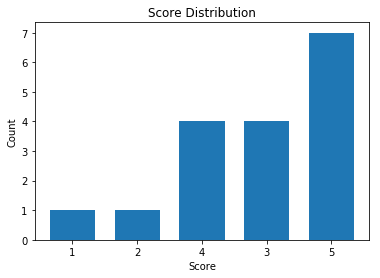

In [6]:
top_reviewer = top_10_reviewers.iloc[0].name[0]
reviews_from_top_reviewer = pd_data.loc[pd_data['UserId'] == top_reviewer]
scores = reviews_from_top_reviewer['Score']

from collections import Counter

labels, values = zip(*Counter(scores).items())

labels = labels[::-1]
values = values[::-1]

indexes = np.arange(len(labels))

plt.bar(indexes, values, 0.7)
plt.xticks(indexes, labels)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution')
plt.show()

### 3. Plot pandas Series DataFrame (Time->Date)

## Part 2